# Descriptive Exploratory Analysis
This notebook explores the structure and distributions of the comments and ratings datasets.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dateparser
from datetime import datetime

In [2]:
# Load the datasets
comments_df = pd.read_csv("C:/Users/Fernanda Costa/OneDrive - Universidade de Aveiro/Desktop/perceived_attractiveness_indice_project/2_pre_processing_NLP/comments_clean.csv")
ratings_df = pd.read_csv("C:/Users/Fernanda Costa/OneDrive - Universidade de Aveiro/Desktop/perceived_attractiveness_indice_project/2_pre_processing_NLP/ratings_clean.csv")

In [3]:
comments_df.head()

,Cidade,Categoria,Nome_Local,Autor,Texto,Data,Rating,Idioma,Data_Convertida,translated_text,Texto_Normalizado,Texto_Lematizado,Polaridade,Polaridade_Média
0,Arouca,restaurante,Tasquinha da Quinta,IC,"I came here as part of a tour, and this restau...",10 months ago,5,en,2024-07-24,"I came here as part of a tour, and this restau...",i came here as part of a tour and this restaur...,come tour restaurant save tour goat meat potat...,0.000000,0.424
1,Arouca,restaurante,Tasquinha da Quinta,Preetam Nath,Has to be the most delicious veal I've had in ...,a year ago,5,en,2024-05-24,Has to be the most delicious veal I've had in ...,has to be the most delicious veal ive had in m...,delicious veal ve life probably good meat ve l...,0.583333,0.424
2,Arouca,restaurante,Tasquinha da Quinta,Roya MJ,Came here as part of a tour and very much appr...,a year ago,5,en,2024-05-24,Came here as part of a tour and very much appr...,came here as part of a tour and very much appr...,come tour appreciate enjoy food vibe service t...,0.240000,0.424
3,Arouca,restaurante,Tasquinha da Quinta,Jonathan lugo,Very good food and an excellent place to eat! ...,a year ago,5,en,2024-05-24,Very good food and an excellent place to eat! ...,very good food and an excellent place to eat w...,good food excellent place eat go group food ta...,0.850000,0.424
4,Arouca,restaurante,Tasquinha da Quinta,Benjamim Nande,Great place for a good typical Portuguese food...,4 months ago,5,en,2025-01-24,Great place for a good typical Portuguese food...,great place for a good typical portuguese food...,great place good typical portuguese food good ...,0.446667,0.424


In [4]:
ratings_df.head()

,Cidade,Categoria,Nome,Rating,Endereço,Tipos,Latitude,Longitude,Total_Reviews,id_unico,Grupo_Tematico,Locais_Semelhantes_Perto
0,Arouca,restaurant,Tasquinha da Quinta,4.6,"R. 1º de Maio 3, 4540-121 Arouca, Portugal","restaurant, food, point_of_interest, establish...",40.929109,-8.245191,2154,d111a3c6,Serviços,6.0
1,Arouca,restaurant,A Assembleia,4.5,"Tv. da Ribeira 11, 4540-102 Arouca, Portugal","restaurant, bar, food, point_of_interest, esta...",40.928766,-8.247588,1788,54221336,Serviços,6.0
2,Arouca,restaurant,Parlamento,4.6,"Tv. da Ribeira 2, 4540-148 Arouca, Portugal","restaurant, food, point_of_interest, establish...",40.929011,-8.247392,2469,ca96ed20,Serviços,7.0
3,Arouca,restaurant,Casa Testinha,4.5,"R. 1º de Maio 4, 4540-113 Arouca, Portugal","restaurant, food, point_of_interest, establish...",40.928876,-8.245147,623,348acace,Serviços,6.0
4,Arouca,restaurant,Pedestre 142,4.4,"R. Dr. Ângelo Miranda 142 RC, 4540-140 Arouca,...","restaurant, food, point_of_interest, establish...",40.930185,-8.253210,1047,55a3ab0d,Serviços,0.0


In [5]:
# Ver número de locais únicos
n_locais = ratings_df['id_unico'].nunique()
print(f"Número de locais turísticos: {n_locais}")

Número de locais turísticos: 3498


In [6]:
# Ver número total de comentários
n_comentarios = comments_df.shape[0]
print(f"Número total de comentários: {n_comentarios}")

Número total de comentários: 9063


In [9]:
ratings_unique = ratings_df.drop_duplicates(subset=["id_unico"])

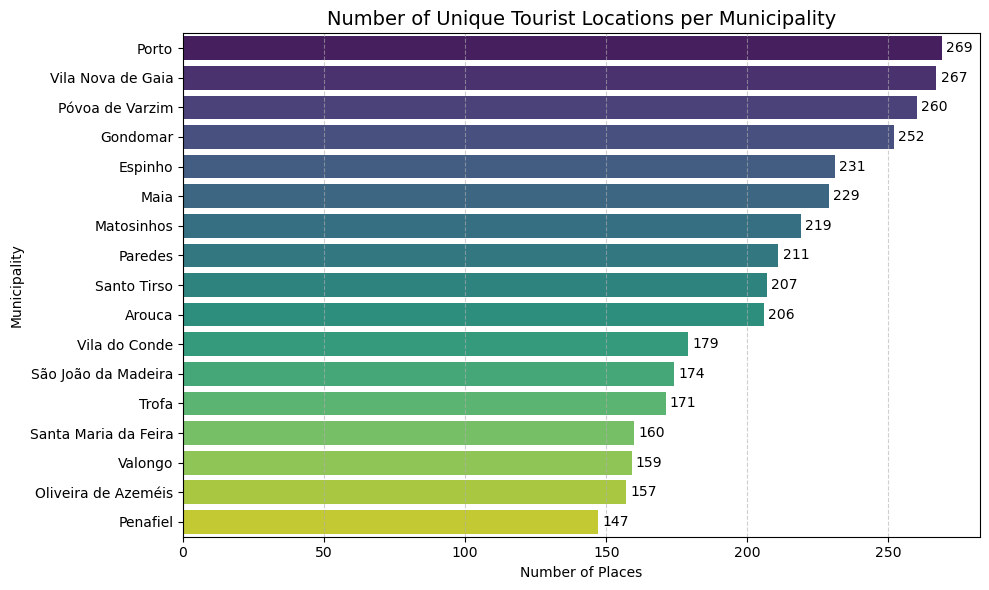

In [11]:
# 1. Contar número de locais por cidade (POIs únicos)
locais_por_cidade = (
    ratings_unique["Cidade"]
    .value_counts()
    .sort_values(ascending=False)
    .reset_index()
)
locais_por_cidade.columns = ["Municipality", "Number of Places"]

# 2. Gráfico de barras horizontal usando palette sem legend
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=locais_por_cidade,
    x="Number of Places",
    y="Municipality",
    hue="Municipality",   # só para usar palette
    palette="viridis",
    dodge=False,          # para não segmentar por hue
    legend=False          # sem legenda
)

# 3. Anotar contagens nas barras
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", padding=3)

plt.title(
    "Number of Unique Tourist Locations per Municipality",
    fontsize=14
)
plt.xlabel("Number of Places")
plt.ylabel("Municipality")
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


=== Rating - Statistics ===
count    3498.000000
mean        4.455718
std         0.400996
min         1.000000
25%         4.300000
50%         4.500000
75%         4.700000
max         5.000000
Name: Rating, dtype: float64

=== Total Reviews - Statistics ===
count     3498.000000
mean       166.302459
std       1780.050042
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      86331.000000
Name: Total_Reviews, dtype: float64


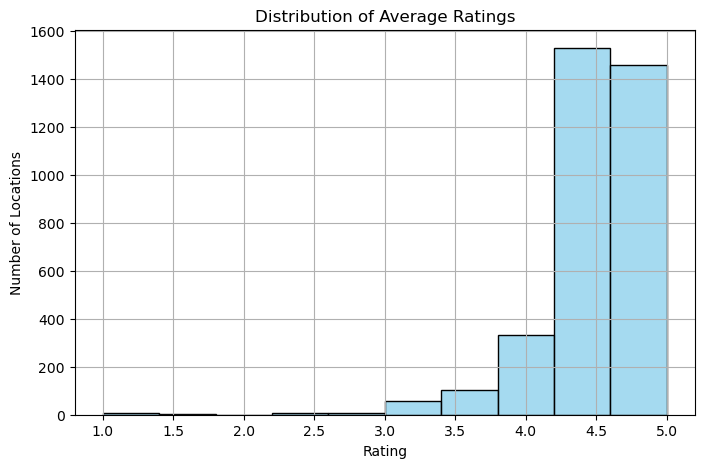

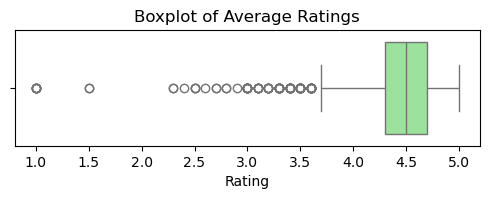

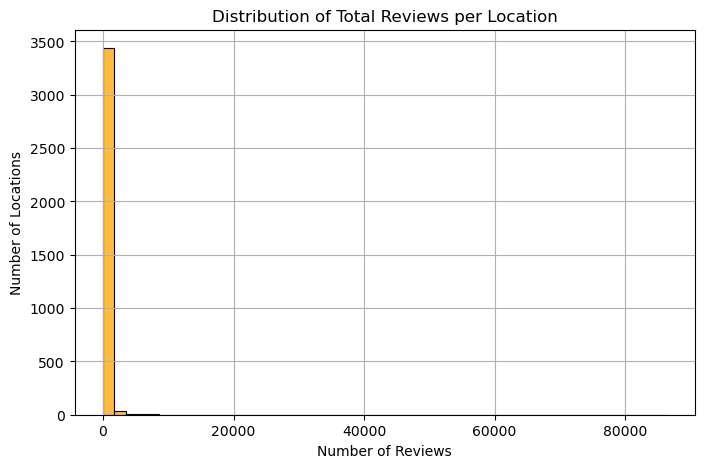

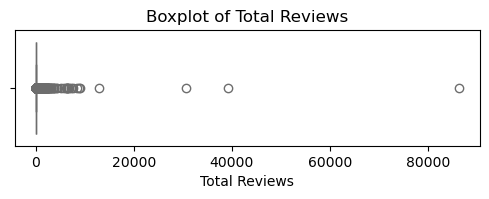


Locations with 5★ but ≤3 reviews:
      id_unico                                             Nome  Rating  \
33    64294dbb                                       O Canastro     5.0   
125   9ce073af                   Igreja Evangélica Betel Arouca     5.0   
129   8d458b5c             Comunidade Cristã A Semente - Arouca     5.0   
155   2f527501                           Ervanária Florisnatura     5.0   
159   f7f4db07                              NATURVIDA ERVANÁRIA     5.0   
...        ...                                              ...     ...   
3466  1c01ad4f                         Praceta Salvador Caetano     5.0   
3467  d67e287a             Cool Kids - Parque Temático Infantil     5.0   
3475  9d511b18                               Largo 5 de Outubro     5.0   
3486  ea1e13ff  Miradouro Praça - Atendimento Municipal de Gaia     5.0   
3491  ea45d4a0                    Catorze de Outubro Houses 387     5.0   

      Total_Reviews  
33                2  
125               2 

In [12]:
# Estatísticas descritivas
print("=== Rating - Statistics ===")
print(ratings_unique["Rating"].describe())
print("\n=== Total Reviews - Statistics ===")
print(ratings_unique["Total_Reviews"].describe())

# Histograma das avaliações
plt.figure(figsize=(8, 5))
sns.histplot(ratings_unique["Rating"], bins=10, kde=False,
             color="skyblue", edgecolor="black")
plt.title("Distribution of Average Ratings")
plt.xlabel("Rating")
plt.ylabel("Number of Locations")
plt.grid(True)
plt.show()

# Boxplot das avaliações
plt.figure(figsize=(6, 1.5))
sns.boxplot(x=ratings_unique["Rating"], color="lightgreen")
plt.title("Boxplot of Average Ratings")
plt.xlabel("Rating")
plt.show()

# Histograma do número de avaliações
plt.figure(figsize=(8, 5))
sns.histplot(ratings_unique["Total_Reviews"], bins=50,
             color="orange", edgecolor="black")
plt.title("Distribution of Total Reviews per Location")
plt.xlabel("Number of Reviews")
plt.ylabel("Number of Locations")
plt.grid(True)
plt.show()

# Boxplot do número de avaliações
plt.figure(figsize=(6, 1.5))
sns.boxplot(x=ratings_unique["Total_Reviews"], color="salmon")
plt.title("Boxplot of Total Reviews")
plt.xlabel("Total Reviews")
plt.show()

# Identificar casos extremos
few_high = ratings_unique[
    (ratings_unique["Total_Reviews"] <= 3) &
    (ratings_unique["Rating"] == 5.0)
]
print("\nLocations with 5★ but ≤3 reviews:")
print(few_high[["id_unico", "Nome", "Rating", "Total_Reviews"]])

many_low = ratings_unique[
    (ratings_unique["Total_Reviews"] > 500) &
    (ratings_unique["Rating"] < 5)
]
print("\nLocations with many reviews and rating < 5★:")
print(many_low[["id_unico", "Nome", "Rating", "Total_Reviews"]])


In [ ]:
# Display info and basic statistics
print(comments_df.info())
print(comments_df.describe(include='all'))
print(ratings_df.info())
print(ratings_df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9063 entries, 0 to 9062
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Cidade             9063 non-null   object 
 1   Categoria          9063 non-null   object 
 2   Nome_Local         9063 non-null   object 
 3   Autor              9063 non-null   object 
 4   Texto              9063 non-null   object 
 5   Data               9063 non-null   object 
 6   Rating             9063 non-null   int64  
 7   Idioma             9063 non-null   object 
 8   Data_Convertida    9063 non-null   object 
 9   translated_text    9058 non-null   object 
 10  Texto_Normalizado  9058 non-null   object 
 11  Texto_Lematizado   8784 non-null   object 
 12  Polaridade         9063 non-null   float64
 13  Polaridade_Média   9063 non-null   float64
dtypes: float64(2), int64(1), object(11)
memory usage: 991.4+ KB
None
       Cidade    Categoria           Nome_Local       A

Language frequency in comments:
   Language  Count
0        en   7332
1        pt   1298
2        nl     68
3        fr     53
4        af     40
5        ro     39
6        es     35
7        id     33
8        de     25
9        so     21
10       ca     21
11       it     20
12       vi     16
13       cs      9
14       pl      8
15       cy      8
16  unknown      5
17       tl      5
18       sw      4
19       sl      4
20       da      3
21       sv      3
22       sq      3
23       hr      2
24       lt      2
25       hu      1
26       sk      1
27       lv      1
28       no      1
29       et      1
30       fi      1


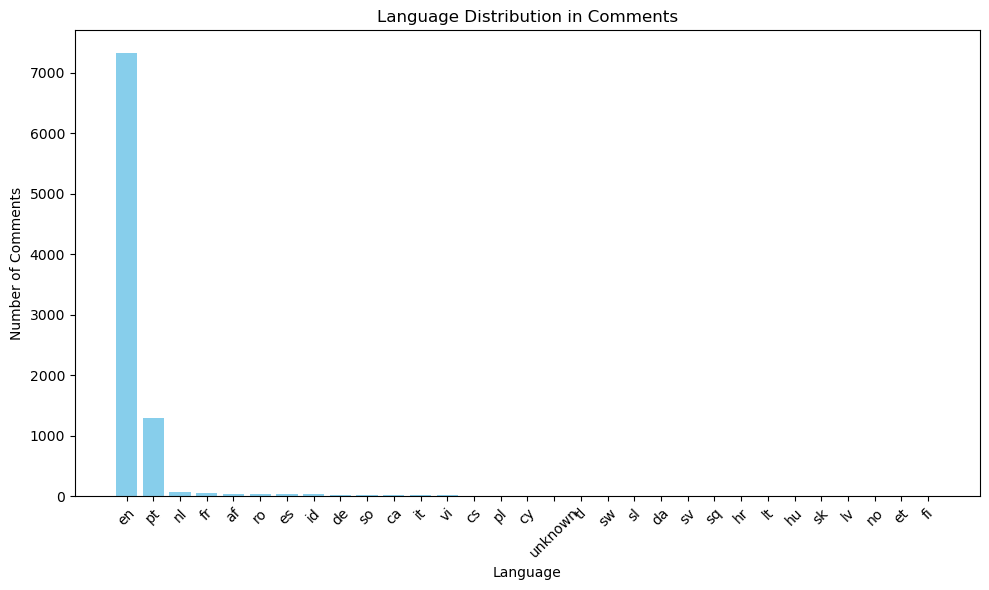

In [ ]:
# Count the frequency of each language
language_counts = comments_df['Idioma'].value_counts().reset_index()
language_counts.columns = ['Language', 'Count']

# Show the table
print("Language frequency in comments:")
print(language_counts)

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(language_counts['Language'], language_counts['Count'], color='skyblue')
plt.xlabel("Language")
plt.ylabel("Number of Comments")
plt.title("Language Distribution in Comments")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\Fernanda Costa\AppData\Local\Temp\ipykernel_11488\3535044625.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


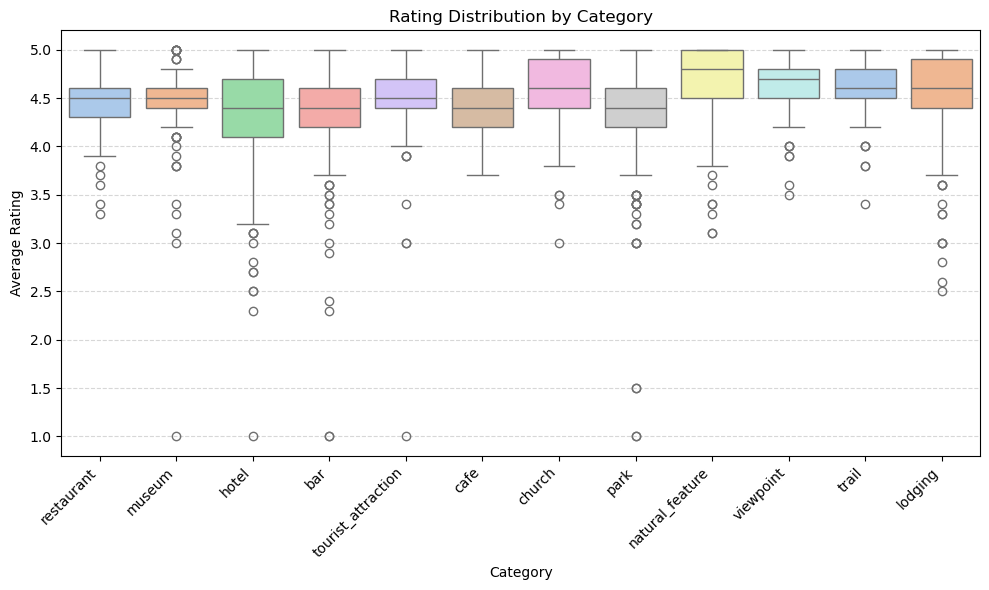

In [ ]:
# Rating Distribution by Category (unique POIs only)
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=ratings_unique,   # usar o DataFrame de POIs únicos
    x='Categoria',
    y='Rating',
    palette='pastel'
)
plt.xticks(rotation=45, ha='right')
plt.title('Rating Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

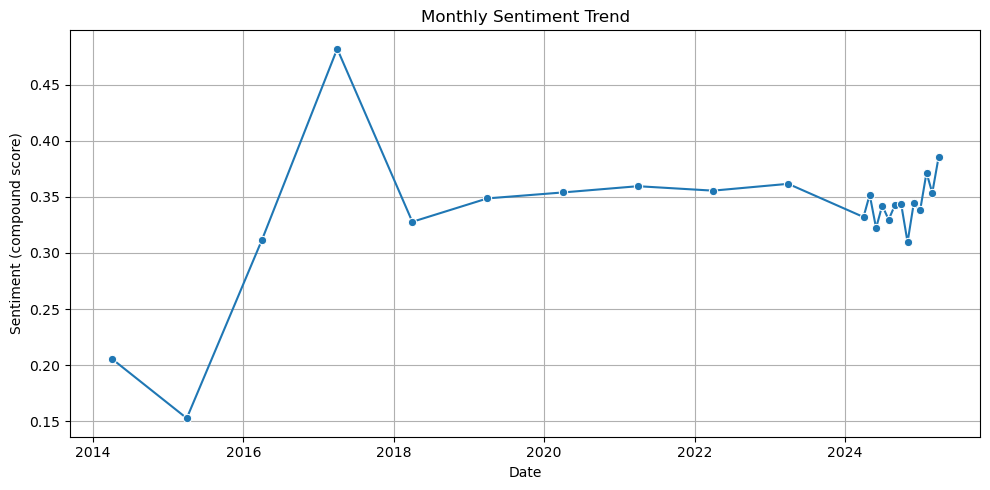

In [ ]:
# Sentiment over time
comments_df['Data_Convertida'] = pd.to_datetime(comments_df['Data_Convertida'], errors='coerce')
df_monthly = comments_df.groupby(comments_df['Data_Convertida'].dt.to_period('M'))['Polaridade'].mean().reset_index()
df_monthly['Data_Convertida'] = df_monthly['Data_Convertida'].dt.to_timestamp()

plt.figure(figsize=(10, 5))
sns.lineplot(data=df_monthly, x='Data_Convertida', y='Polaridade', marker='o')
plt.title("Monthly Sentiment Trend")
plt.xlabel("Date")
plt.ylabel("Sentiment (compound score)")
plt.grid(True)
plt.tight_layout()
plt.show()

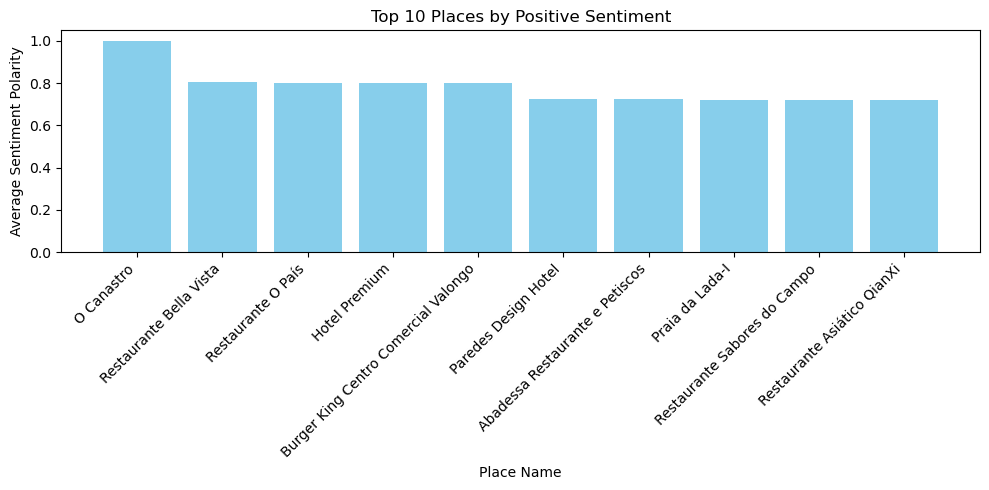

In [ ]:
# Calcular a média da polaridade por local
polaridade_media = comments_df.groupby("Nome_Local")["Polaridade"].mean().sort_values(ascending=False)

# Top 10 locais mais positivos
top_positivos = polaridade_media.head(10)

# Gráfico
plt.figure(figsize=(10, 5))
plt.bar(top_positivos.index, top_positivos.values, color='skyblue')
plt.xticks(rotation=45, ha="right")
plt.xlabel("Place Name")
plt.ylabel("Average Sentiment Polarity")
plt.title("Top 10 Places by Positive Sentiment")
plt.tight_layout()
plt.show()

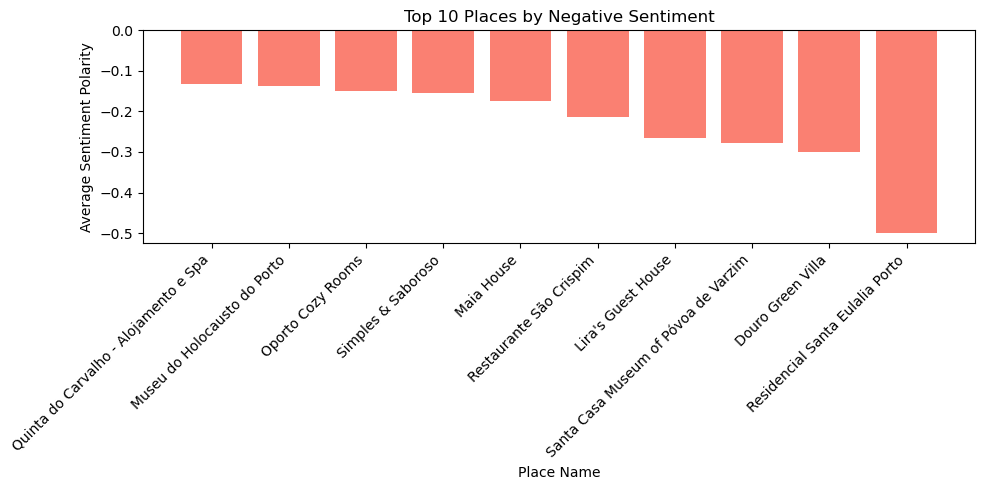

In [ ]:
# Top 10 locais mais negativos
top_negativos = polaridade_media.tail(10)

# Gráfico
plt.figure(figsize=(10, 5))
plt.bar(top_negativos.index, top_negativos.values, color='salmon')
plt.xticks(rotation=45, ha="right")
plt.xlabel("Place Name")
plt.ylabel("Average Sentiment Polarity")
plt.title("Top 10 Places by Negative Sentiment")
plt.tight_layout()
plt.show()

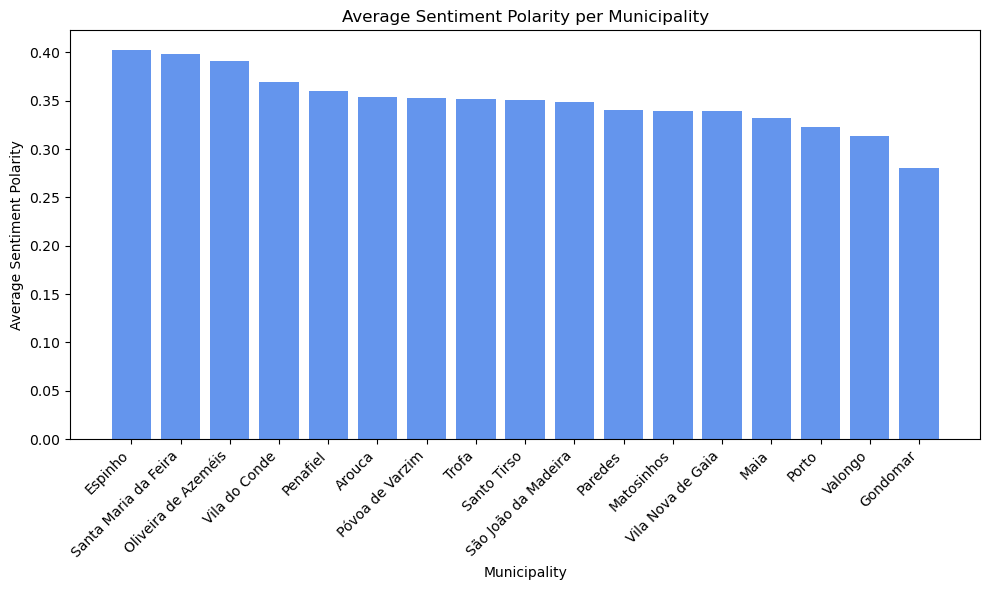

In [ ]:
# Calcular média da polaridade por município
polaridade_municipio = comments_df.groupby("Cidade")["Polaridade"].mean().sort_values(ascending=False)

# Gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(polaridade_municipio.index, polaridade_municipio.values, color='cornflowerblue')
plt.xticks(rotation=45, ha="right")
plt.xlabel("Municipality")
plt.ylabel("Average Sentiment Polarity")
plt.title("Average Sentiment Polarity per Municipality")
plt.tight_layout()
plt.show()

In [ ]:
# Garantir que Data_Convertida está em datetime e ordenar
comments_df['Data_Convertida'] = pd.to_datetime(comments_df['Data_Convertida'], errors='coerce')
comments_df = comments_df.sort_values(by='Data_Convertida')

# Agrupar por local e calcular polaridade média no início e no fim
var_polaridade = comments_df.groupby('Nome_Local').agg(
    primeira_data=('Data_Convertida', 'min'),
    ultima_data=('Data_Convertida', 'max')
).reset_index()

# Obter polaridade média na primeira e última datas por local
polaridade_inicial = comments_df.groupby(['Nome_Local', 'Data_Convertida'])['Polaridade'].mean().reset_index()
polaridade_inicial = polaridade_inicial.sort_values(['Nome_Local', 'Data_Convertida'])

# Obter o primeiro e o último valor de polaridade por local
first_polaridade = polaridade_inicial.groupby('Nome_Local').first().reset_index()
last_polaridade = polaridade_inicial.groupby('Nome_Local').last().reset_index()

# Juntar os dois e calcular a diferença
var_polaridade = var_polaridade.merge(first_polaridade[['Nome_Local', 'Polaridade']], on='Nome_Local')
var_polaridade = var_polaridade.merge(last_polaridade[['Nome_Local', 'Polaridade']], on='Nome_Local', suffixes=('_inicio', '_fim'))

# Calcular variação
var_polaridade['Variação_Polaridade'] = var_polaridade['Polaridade_fim'] - var_polaridade['Polaridade_inicio']

# Ver os locais com maior melhoria ou maior queda
var_polaridade = var_polaridade.sort_values(by='Variação_Polaridade', ascending=False)
var_polaridade[['Nome_Local', 'Polaridade_inicio', 'Polaridade_fim', 'Variação_Polaridade']].head(10)

,Nome_Local,Polaridade_inicio,Polaridade_fim,Variação_Polaridade
792,Palace Hotel & Spa Termas de São Vicente,-1.000000,0.648951,1.648951
76,Ao Forno,-1.000000,0.493519,1.493519
2,100 Montaditos Póvoa de Varzim,-0.500000,0.775000,1.275000
658,Museu Internacional de Escultura Contemporânea...,-0.600000,0.542187,1.142187
877,Posta Do Conde (vila Do Conde),-0.050000,1.000000,1.050000
1030,Quinta D'As Raparigas,-0.600000,0.440625,1.040625
261,Casa-Museu Egas Moniz,0.000000,1.000000,1.000000
1122,Restaurante Cocktail,0.000000,1.000000,1.000000
1403,ibis budget Porto Gaia,-0.616667,0.350000,0.966667
1232,Sandes & Pratos,-0.250000,0.666667,0.916667


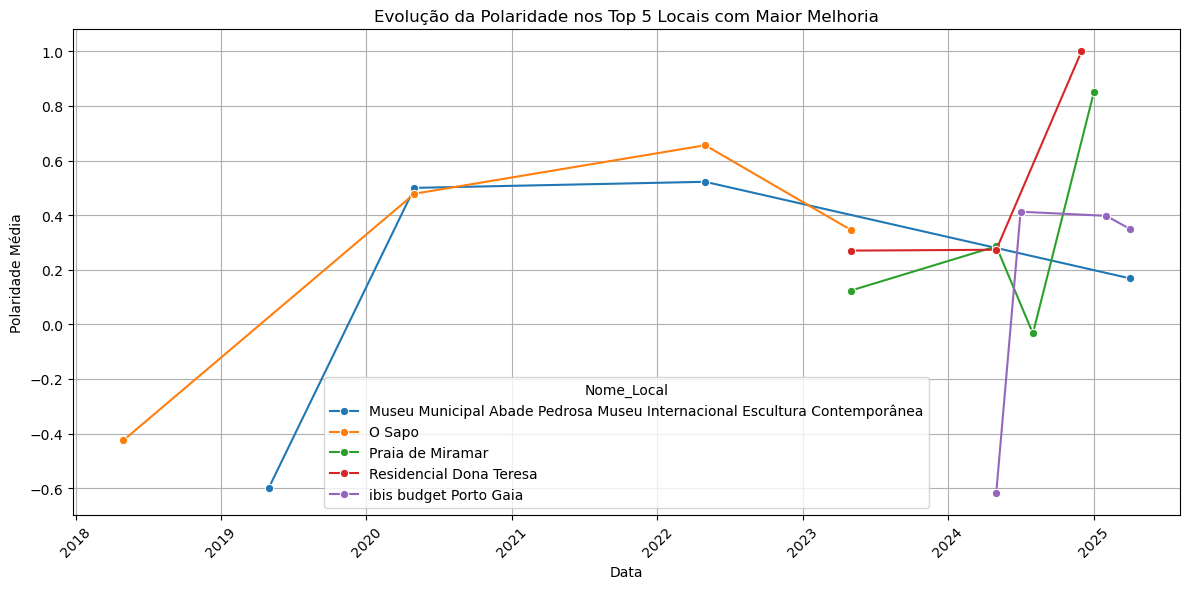

In [ ]:
# Converter a coluna de datas relativas
comments_df['Data_Convertida'] = comments_df['Data'].apply(lambda x: dateparser.parse(x, settings={'RELATIVE_BASE': datetime.today()}))

# Limpar valores nulos
comments_df = comments_df.dropna(subset=['Data_Convertida', 'Polaridade'])

# Calcular número de comentários e polaridade média por local e mês
monthly_sentiment = comments_df.groupby(['Nome_Local', comments_df['Data_Convertida'].dt.to_period('M')]).agg(
    Polaridade_Media=('Polaridade', 'mean'),
    Num_Comentarios=('Polaridade', 'count')
).reset_index()

monthly_sentiment['Data_Convertida'] = monthly_sentiment['Data_Convertida'].dt.to_timestamp()

# Obter valores de início e fim
inicio = monthly_sentiment.groupby('Nome_Local').first().reset_index()
fim = monthly_sentiment.groupby('Nome_Local').last().reset_index()

# Calcular variação
variacao = inicio[['Nome_Local', 'Polaridade_Media']].merge(
    fim[['Nome_Local', 'Polaridade_Media']], on='Nome_Local', suffixes=('_Inicio', '_Fim')
)
variacao['Variacao_Polaridade'] = variacao['Polaridade_Media_Fim'] - variacao['Polaridade_Media_Inicio']

# Adicionar número médio de comentários
n_comentarios = monthly_sentiment.groupby('Nome_Local')['Num_Comentarios'].mean().reset_index()
variacao = variacao.merge(n_comentarios, on='Nome_Local')

# Filtrar locais com pelo menos 2 comentários/mês
variacao_filtrada = variacao[variacao['Num_Comentarios'] >= 2]

# Top 5 com maior melhoria
top5 = variacao_filtrada.sort_values(by='Variacao_Polaridade', ascending=False).head(5)
top5_nomes = top5['Nome_Local'].tolist()

# Dados para gráfico
dados_top5 = monthly_sentiment[monthly_sentiment['Nome_Local'].isin(top5_nomes)]

# Gráfico
plt.figure(figsize=(12, 6))
sns.lineplot(data=dados_top5, x='Data_Convertida', y='Polaridade_Media', hue='Nome_Local', marker='o')
plt.title("Evolução da Polaridade nos Top 5 Locais com Maior Melhoria")
plt.xlabel("Data")
plt.ylabel("Polaridade Média")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()